# Tensorflow
Tensorflow是google推出的深度学习框架，是目前热度最高的深度学习框架
- 优点：由google进行支持，功能强大，资料丰富
- 缺点：使用静态图模型，必须先定义计算图，再填入数据进行运算，需要手动计算矩阵的shape变化，编程与调试较麻烦  

使用Tensorflow能大大缩短你搭建网络所需的时间

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from depends.tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

## 常量
Tensorflow的各种参与运算的量都有自己的定义  
用tf.constant()定义常量

In [2]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


可以看到print并没有打印出结果，这是因为Tensorflow基于静态图模型，先静态定义计算图，再将数据放入图中进行运算之后才会有结果  
Tensorflow用session来开启运算

In [3]:
sess = tf.Session()
print(sess.run(c))

20


## 变量
Tensorflow用tf.Variable()定义变量  
所有变量在运算之前必须通过tf.global_variables_initializer()进行初始化  

In [4]:
y_hat = tf.constant(36, name='y_hat')           
y = tf.constant(39, name='y')                    

loss = tf.Variable((y - y_hat)**2, name='loss')  

init = tf.global_variables_initializer()         
                                                
with tf.Session() as session:                   
    session.run(init)                           
    print(session.run(loss))    

9


with tf.Session() as session: 用来声明一个局部的Session，这个Session在运行完里面的运算后就会自动关闭，无法再重复使用

## 占位符
Tensorflow用tf.placeholder()来声明占位符，占位符一般用于接收输入进行运算  
在运算用feed_dict = {占位符：值}来指定占位符的输入

In [5]:
x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


## 线性连接
实现$Y = WX + b$  
令W的shape为(4, 3),X的shape为(3,1)，b的shape为(4,1)  

- tf.matmul(..., ...)用来做矩阵乘法
- tf.add(..., ...)用来做加法
- np.random.randn(...)用来生成随机数

In [6]:
def linear_function():

    np.random.seed(1)

    X = tf.constant(np.random.randn(3,1), name = "X")
    W = tf.Variable(np.random.randn(4,3), name = "X")
    b = tf.constant(np.random.randn(4,1), name = "X")
    Y = tf.Variable(tf.add(tf.matmul(W, X), b))
    init = tf.global_variables_initializer()
    
    sess = tf.Session()
    sess.run(init)
    result = sess.run(Y)

    sess.close()

    return result

In [7]:
print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


## Sigmoid
- `tf.placeholder(tf.float32, name = "...")`接受输入
- `tf.sigmoid(...)`Tf提供的sigmoid实现
- `sess.run(..., feed_dict = {x: z})`用feed_dict为placeholder提供输入  

**方法1:**
```python
sess = tf.Session()
#initialization
result = sess.run(..., feed_dict = {...})
sess.close()
```
**方法2:**
```python
with tf.Session() as sess: 
    #initialization
    result = sess.run(..., feed_dict = {...})
```

In [8]:
def sigmoid(z):

    x = tf.placeholder(tf.float32, name = "x")

    sigmoid = tf.sigmoid(x)

    with tf.Session() as sess:

        result = sess.run(sigmoid, feed_dict = {x: z})
    
    
    return result

In [9]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.999994


## 损失计算
以二类交叉熵损失为例：
$$ J = \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large $$ 

用numpy实现交叉熵代价函数，需要自己实现其中的每一步计算  
Tensorflow已经定义了各种常用的代价函数，其中`tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)`一个函数实现sigmoid激活与二类交叉熵代价

In [10]:
def cost(logits, labels):

    z = tf.placeholder(tf.float32, name = "z")
    y = tf.placeholder(tf.float32, name = "y")

    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z, labels = y)

    sess = tf.Session()

    cost = sess.run(cost, feed_dict = {z: logits, y: labels})

    sess.close()
    
    return cost

In [11]:
logits = np.array([0.2,0.4,0.7,1.1])
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [ 0.79813886  0.91301525  0.40318602  0.28733534]


## one-hot 编码
比如某特征或某标签有N类，用N个二进制位表示这个特征或标签，它属于第m类，那第m个二进制位为1，其余为0，这就是one-hot编码  
<img src = "source\one-hot.png"></img>  

Tensorflow用tf.one_hot(labels, depth, axis)来实现one-hot编码

In [12]:
def one_hot_matrix(labels, C):

    C = tf.constant(C, name = "C")

    one_hot_matrix = tf.one_hot(labels, C, axis = -1)

    sess = tf.Session()

    one_hot = sess.run(one_hot_matrix)

    sess.close()
    
    return one_hot

In [13]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]]


## 0&1初始化
对应numpy的np.zeros与np.ones  
有tf.zeros与tf.ones，用法与numpy相同

In [14]:
def ones(shape):

    ones = tf.ones(shape)

    sess = tf.Session()

    ones = sess.run(ones)

    sess.close()

    return ones

In [15]:
print ("ones = " + str(ones([3])))

ones = [ 1.  1.  1.]


## 简单的神经网络
搭建一个简单的神经网络用来训练如下的手势数据集：  
<img src = "source\gestures.png"></img>  

- **Training set**: 1080张图片(64 x 64)，6类
- **Test set**: 120张图片

In [16]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 5


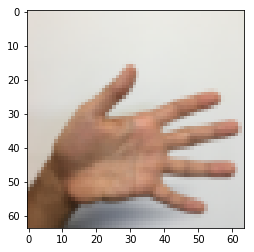

In [17]:
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

对数据进行预处理

In [18]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

X_train = X_train_flatten/255.
X_test = X_test_flatten/255.

Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


### 创建placeholder
placeholder要满足输入数据的shape  

In [19]:
def create_placeholders(n_x, n_y):

    X = tf.placeholder(tf.float32, shape = [n_x, None])
    Y = tf.placeholder(tf.float32, shape = [n_y, None])

    return X, Y

In [20]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(6, ?), dtype=float32)


### 权重初始化
使用tf.get_variable("W", [n,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))为W初始化  
使用tf.get_variable("b", [n,1], initializer = tf.zeros_initializer())为b初始化  
假设有3层，分别有25、12、6个神经元  

In [21]:
def initialize_parameters():

    tf.set_random_seed(1)                   

    W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [22]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


### 前向传播
- `tf.add(...,...)` 实现矩阵加法
- `tf.matmul(...,...)` 实现矩阵乘法
- `tf.nn.relu(...)` 实现relu激活

In [23]:
def forward_propagation(X, parameters):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1, X), b1)                                            
    A1 = tf.nn.relu(Z1)                      
    Z2 = tf.add(tf.matmul(W2, A1), b2)                                              
    A2 = tf.nn.relu(Z2)                                    
    Z3 = tf.add(tf.matmul(W3, A2), b3)             
    
    return Z3

In [24]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


### 代价计算
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...))用于计算多类交叉熵的代价  
tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...)一个函数实现了softmax计算与多类交叉熵运算  
tf.reduce_mean在某一维上求平均值，实际上Tensorflow中有一系列reduce_xxx函数，都是在某一维上进行运算  
因为tensorflow的算法接收的数据shape都是(样本数, 样本形状)，而我们的数据shape是(样本形状, 样本数),所以需要对输入进行一个转置

In [25]:
def compute_cost(Z3, Y):

    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))

    return cost

In [26]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


### 反向传播与权重更新
Tensorflow封装好了整个反向传播以及权重更新的过程  
例如，利用梯度下降更新权重：  
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)    
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})  
```

In [29]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                       
    tf.set_random_seed(1)                            
    seed = 3                                          
    (n_x, m) = X_train.shape                        
    n_y = Y_train.shape[0]                            
    costs = []                                       

    X, Y = create_placeholders(n_x, n_y)

    parameters = initialize_parameters()

    Z3 = forward_propagation(X, parameters)

    cost = compute_cost(Z3, Y)

    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost) 

    init = tf.global_variables_initializer()

    with tf.Session() as sess:

        sess.run(init)

        for epoch in range(num_epochs):

            epoch_cost = 0.                      
            num_minibatches = int(m / minibatch_size)
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                (minibatch_X, minibatch_Y) = minibatch
                
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)

        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.017465
Cost after epoch 200: 0.733235
Cost after epoch 300: 0.572536
Cost after epoch 400: 0.467886
Cost after epoch 500: 0.380517
Cost after epoch 600: 0.312931
Cost after epoch 700: 0.253810
Cost after epoch 800: 0.203292
Cost after epoch 900: 0.166193
Cost after epoch 1000: 0.143193
Cost after epoch 1100: 0.105985
Cost after epoch 1200: 0.086151
Cost after epoch 1300: 0.058658
Cost after epoch 1400: 0.051540


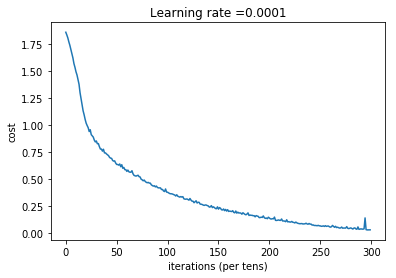

Parameters have been trained!
Train Accuracy: 0.999074
Test Accuracy: 0.733333


In [30]:
parameters = model(X_train, Y_train, X_test, Y_test)